In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
np.random.seed(2304)

In [4]:
pd.set_option('display.max_rows', 500)

In [32]:
heart = pd.read_csv(r'echocardiogram.csv' )
heart


,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.00,0.0,71.000,0.0,0.260,9.000,4.600,14.00,1.000,1.000,name,1,0.0
1,19.00,0.0,72.000,0.0,0.380,6.000,4.100,14.00,1.700,0.588,name,1,0.0
2,16.00,0.0,55.000,0.0,0.260,4.000,3.420,14.00,1.000,1.000,name,1,0.0
3,57.00,0.0,60.000,0.0,0.253,12.062,4.603,16.00,1.450,0.788,name,1,0.0
4,19.00,1.0,57.000,0.0,0.160,22.000,5.750,18.00,2.250,0.571,name,1,0.0
5,26.00,0.0,68.000,0.0,0.260,5.000,4.310,12.00,1.000,0.857,name,1,0.0
6,13.00,0.0,62.000,0.0,0.230,31.000,5.430,22.50,1.875,0.857,name,1,0.0
7,50.00,0.0,60.000,0.0,0.330,8.000,5.250,14.00,1.000,1.000,name,1,0.0
8,19.00,0.0,46.000,0.0,0.340,0.000,5.090,16.00,1.140,1.003,name,1,0.0
9,25.00,0.0,54.000,0.0,0.140,13.000,4.490,15.50,1.190,0.930,name,1,0.0


In [33]:


#heart[heart.thalach=='?'] for finding values
      
heart = heart.drop(['name', 'aliveat1', 'group'], axis=1)
print(heart.dtypes)
heart.shape


survival                float64
alive                   float64
age                     float64
pericardialeffusion     float64
fractionalshortening    float64
epss                    float64
lvdd                    float64
wallmotion-score        float64
wallmotion-index        float64
mult                    float64
dtype: object


(133, 10)

In [34]:
heart=heart.dropna()

In [35]:
heart=heart.convert_objects(convert_numeric=True)
heart.dtypes

survival                float64
alive                   float64
age                     float64
pericardialeffusion     float64
fractionalshortening    float64
epss                    float64
lvdd                    float64
wallmotion-score        float64
wallmotion-index        float64
mult                    float64
dtype: object

In [63]:
alive = heart.ix[:, ['alive']]
alive.shape

(106, 1)

In [64]:
print(alive.shape)
print(heart.shape)

(106, 1)
(106, 10)


In [65]:
alive = alive.values

In [66]:
alive = alive.reshape(106,)
alive.shape

(106,)

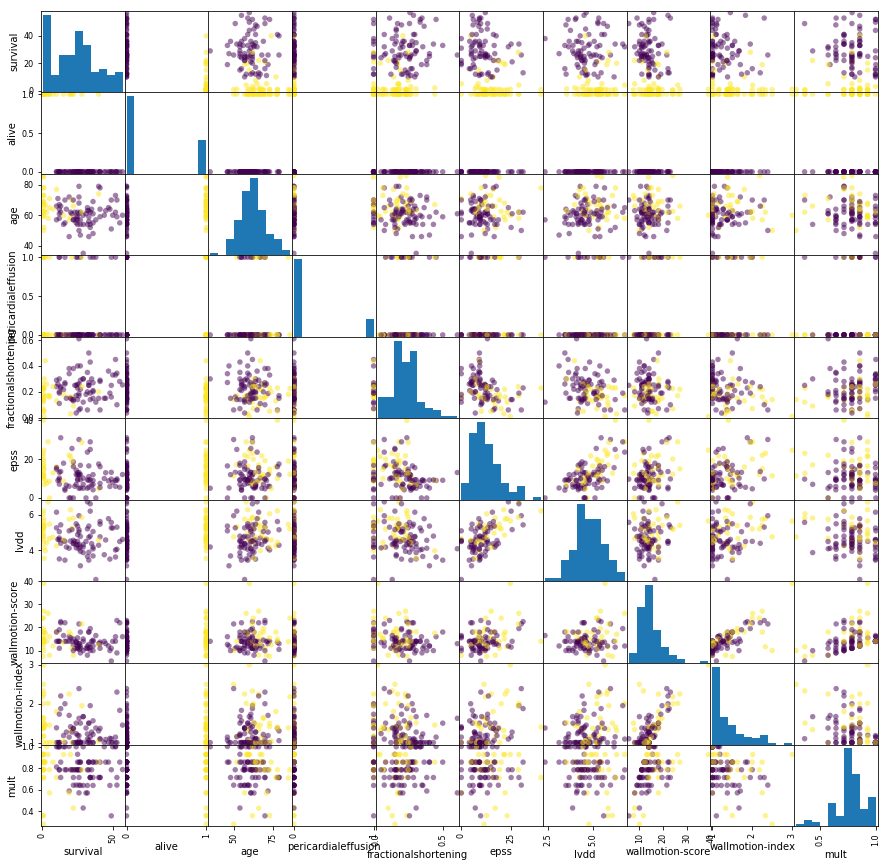

In [67]:
pd.plotting.scatter_matrix(heart, c=alive, figsize=(15,15), marker='o', s=30),
plt.show()

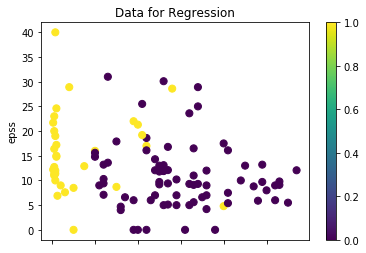

In [68]:
heart.plot.scatter(x='survival', y='epss', c=alive, colormap='viridis', s=50, title='Data for Regression');


In [59]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

X = heart.ix[:, 0:1]
y = heart.ix[:, 2:3]
print(X.shape)
print(y.shape)
#2=heart['age']
#2.shape
reg.fit(X,y)

(106, 1)
(106, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
#X_new = np.linspace(20, 90, 1000).reshape(-1,1)

In [61]:
y_proba = reg.predict(X)
y_proba

array([[13.73588967],
       [12.73713443],
       [13.11166764],
       [ 7.99304706],
       [12.73713443],
       [11.8632236 ],
       [13.48620086],
       [ 8.86695789],
       [12.73713443],
       [11.988068  ],
       [13.86073407],
       [ 8.61726908],
       [ 8.61726908],
       [ 9.61602432],
       [15.04675591],
       [12.11291241],
       [15.04675591],
       [15.04675591],
       [12.36260122],
       [14.98433371],
       [15.01554481],
       [15.01554481],
       [15.04675591],
       [14.48495609],
       [ 9.1166467 ],
       [11.48869038],
       [11.48869038],
       [10.61477955],
       [14.98433371],
       [11.73837919],
       [11.8632236 ],
       [11.11415717],
       [13.11166764],
       [10.11540194],
       [14.85948931],
       [12.61229002],
       [13.86073407],
       [13.61104526],
       [14.98433371],
       [13.86073407],
       [ 9.49117991],
       [12.36260122],
       [ 8.49242468],
       [11.8632236 ],
       [11.8632236 ],
       [15

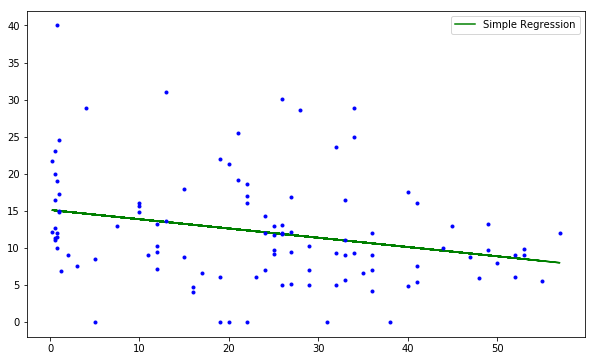

In [62]:
f = plt.figure(figsize=(10, 6))
plt.plot(X, y_proba[:, 0], "g-", label="Simple Regression")
plt.plot(X, y, 'bo', markersize=3)
plt.legend(loc='best')

In [ ]:
reg.score(X, y)

In [ ]:
reg.get_params()

In [ ]:
sample = reg.predict(50)
sample

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, C=10**10)
log_reg.fit(X, y)

In [ ]:
reg2 = linear_model.LinearRegression()
reg2.fit(X2, y2)

In [ ]:
y2_proba = reg2.predict(X2)

In [ ]:
y2_proba

In [ ]:
y3_proba =log_reg.predict_proba(X2)
y3_proba

In [ ]:
f = plt.figure(figsize=(10, 6))
plt.plot(X2, y3_proba[:, 0], "g-", label="Simple Regression")
plt.plot(X2, y2, 'bo', markersize=3)
plt.legend(loc='best')

In [ ]:
plot_decision_regions(X2, y2, log_reg)

In [ ]:
X2

In [ ]:
heart

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
a = heart.ix[:, 0:8]
b = heart.ix[:, 8:9]
b

In [ ]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(a, b, random_state=2304)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
#from sklearn.datasets import make_regression
#X_train, y_train = make_regression(n_features=2, n_informative=2, random_state=2304, shuffle=False)
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
importances=regr.feature_importances_
X_train

In [ ]:
y_pred=regr.predict(X_test)
y_pred

In [ ]:
regr.score(X_test, y_test)

In [ ]:
regr.decision_path(X_test)

In [ ]:
#indices = np.argsort(importances)[::-1]
#XX = heart[heart.columns[:-1]]

#for f in range(XX.shape[1]): 
 #   print(f'{XX.columns[indices[f]]}: {np.round(importances[indices[f]],3)}')

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
print(regr.score(X_test, y_test))

In [ ]:
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(X_train, y_train)
y_pred_svm=svm_reg.predict(X_test)
print(svm_reg.score(X_test, y_test))
mean_squared_error(y_test, y_pred_svm)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
y_pred_sgd=sgd_reg.predict(X_test)
print(sgd_reg.score(X_test, y_test))
mean_squared_error(y_test, y_pred_sgd)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_knn=knn_reg.predict(X_test)
print(knn_reg.score(X_test, y_test))
mean_squared_error(y_test, y_pred_knn)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
gau_reg = GaussianProcessRegressor()
gau_reg.fit(X_train, y_train)
y_pred_gau=gau_reg.predict(X_test)
print(gau_reg.score(X_test, y_test))
mean_squared_error(y_test, y_pred_gau)

In [ ]:
gau_reg.score(X_test, y_test)

In [ ]:
'''this seems way to good '''

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)
y_pred_mlp=mlp_reg.predict(X_test)
mean_squared_error(y_test, y_pred_mlp)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 10)]
bootstrap = [True, False]
criterion = ['mse', 'mae']

random_grid = {'n_estimators': n_estimators, 'bootstrap': bootstrap, 'criterion': criterion}

print(random_grid)

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#grid = GridSearchCV(estimator=regr, param_grid=random_grid, scoring='neg_mean_squared_error')
#grid.fit(X_train, y_train)

In [ ]:
#grid.best_estimator_

In [ ]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=89, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
mean_squared_error(y_test, y_pred)

In [ ]:
X3 = heart.ix[:, ['age']]
y3 = heart.ix[:, ['thalach']]
print(X3.shape)
print(y3.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42, test_size=0.2)

In [ ]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

#Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge, hist=False, train_color='y', test_color='black')
visualizer.fit(X3_train, y3_train)  # Fit the training data to the model
visualizer.score(X3_test, y3_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [14]:
visualizer = ResidualsPlot(svm_reg, hist=False, train_color='y', test_color='black')
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

NameError: name 'ResidualsPlot' is not defined

In [15]:
visualizer = ResidualsPlot(regr, hist=False, train_color='y', test_color='black')
B=visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

NameError: name 'ResidualsPlot' is not defined

In [16]:
X_train.shape

NameError: name 'X_train' is not defined

In [17]:
B

NameError: name 'B' is not defined

In [18]:
from sklearn.linear_model import Ridge
ridge = Ridge()
visualizer = ResidualsPlot(ridge, hist=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

NameError: name 'ResidualsPlot' is not defined

In [19]:
X2 = heart.ix[:, ['age', 'survival']]
y2 = heart.ix[:, ['alive']]
print(X2.shape)
print(y2.shape)

(61, 2)
(61, 1)


In [20]:
X2 = X2.values
y2 = y2.values
y2.shape

(61, 1)

In [24]:
y2 = y2.reshape(61,)
y2.shape
#X2.shape

(61,)

In [25]:
X=X2
y=y2

In [27]:
y.shape

(61,)

In [28]:
def plot_decision_regions(X, y, classifier):
    """
    Modified from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb
    """
    
    f = plt.figure()

    # Find the lower and upper values for the petal length and petal width
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate a bunch of measurements in-between the min and max values
    x0, x1 = np.meshgrid(
        np.linspace(x0_min, x0_max, 500).reshape(-1, 1),
        np.linspace(x1_min, x1_max, 200).reshape(-1, 1),
    )
    
    X_new = np.array([x0.ravel(), x1.ravel()]).T
    
    # Predict with the classifier on the new data
    Z = classifier.predict(X_new)
    
    # Reshape and plot as a contour plot:
    Z = Z.reshape(x0.shape)
    plt.contourf(x0, x1, Z, alpha=0.4, cmap=plt.cm.brg)
    
    # Add the training instances to the plot
    
    markers = ['o', 'x']
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    edgecolor='black', 
                    marker = markers[idx],
                    label=cl)
        
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")

    plt.text(x0_min+2, x0_min+2, "Not Iris-Virginica", fontsize=12, color="b", ha="center")
    plt.text(x1_max+3, x1_max-2, "Iris-Virginica", fontsize=12, color="g", ha="center")

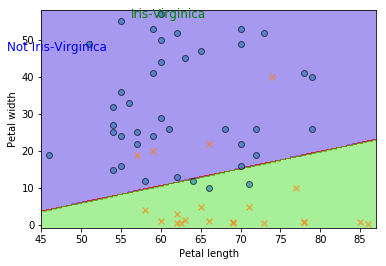

In [31]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X2,y2)
plot_decision_regions(X2, y2, softmax_reg)


In [ ]:
regr2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=89, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
regr2.fit(X2, y2)
#y_pred=regr.predict(X_test)
#mean_squared_error(y_test, y_pred)

In [ ]:
plot_decision_regions(X2, y2, regr2)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
gau_reg = GaussianProcessRegressor()
gau_reg.fit(X2, y2)
plot_decision_regions(X2, y2, gau_reg)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X2, y2)
plot_decision_regions(X2, y2, knn_reg)